## Project: Breast Cancer Classification with SVM

#### Cancer remains one of the most significant health challenges worldwide. Early and accurate detection is crucial for effective treatment and improved patient outcomes. Machine learning, specifically Support Vector Machine (SVM), offers a powerful tool for classifying cancerous and healthy tissues based on various biomarkers. This project aims to build an SVM model to classify samples as either cancerous or healthy using Python.

### Dataset

#### The dataset used in this project is the Breast Cancer Wisconsin (Diagnostic) dataset, available in the sklearn.datasets module.

In [1]:
#### Import Libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#### Load and Explore Data

# Load the dataset

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

#df = pd.read_csv('data.csv')


# Display the first few rows of the dataset
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
#### Preprocess Data

# Split data into features and target
X = df.drop(columns='target')
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:

#### Build and Train SVM Model

# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)



SVC(kernel='linear', random_state=42)

In [5]:
#### Evaluate the Model

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



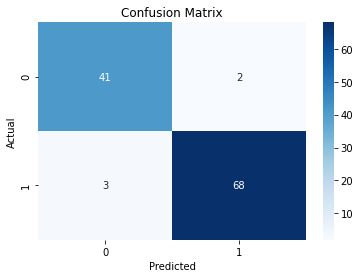

In [6]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



#### Our model predicted ‘0’ correctly 41 times while predicting ‘0’ incorrectly 3 times
#### Also it predicted ‘1’ incorrectly 2 times while predicting ‘1’ correctly 68 times

### Conclusions
#### In this project, we successfully built an SVM model to classify cancerous and healthy samples. Our model achieved an accuracy of  96%, indicating strong performance. The confusion matrix and classification report further demonstrated the model's ability to accurately distinguish between cancerous and healthy samples.
#### Support Vector Machine proved to be an effective tool for this binary classification task. However, further improvements could be achieved by optimizing hyperparameters, experimenting with different kernels, and using a larger and more diverse dataset. This project highlights the potential of machine learning in biomedical research and its importance in aiding early cancer detection.


### Analyzing feature importances

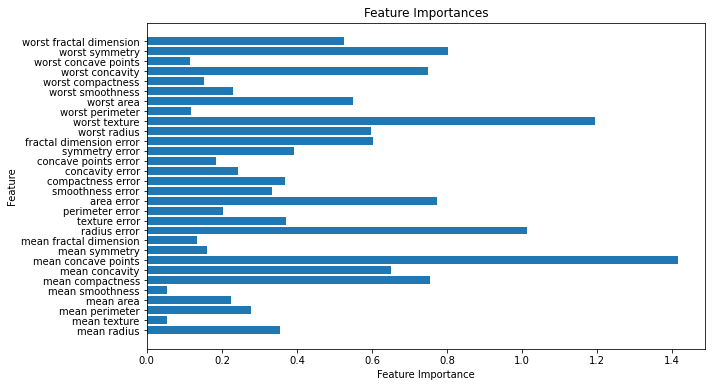

In [7]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(df.columns[:-1], np.abs(svm_model.coef_[0]))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


#### Higher Bar: Features with higher bar lengths are more important for the model, meaning they have a larger influence on the model's predictions.

#### Pairwise Feature Scatter Plots: Select a subset of features (e.g., the most important ones) and  create pairwise scatter plots to visualize the relationship between them and the target variable.

<ipython-input-8-949d19049b00>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['target'] = df_subset['target'].map({0: target_names[0], 1: target_names[1]})


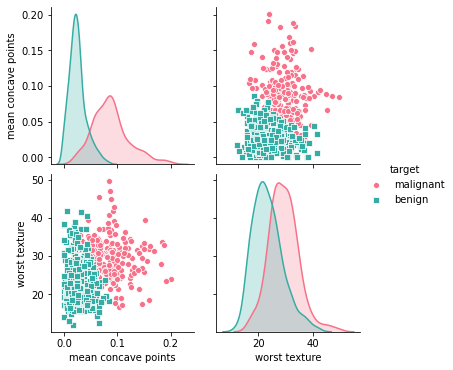

In [8]:
# Create a DataFrame with the two features and the target variable
df_subset = df[['mean concave points', 'worst texture', 'target']]

# Map target values to their corresponding labels
target_names = ['malignant', 'benign']
df_subset['target'] = df_subset['target'].map({0: target_names[0], 1: target_names[1]})

# Create pairwise scatter plots
sns.pairplot(df_subset, hue='target', markers=['o', 's'], palette='husl')
plt.show()


In [9]:
## Save the SVM model

from joblib import dump, load

# Save the trained model to an HDF5 file
dump(svm_model, 'svm_model.h5')

# Load the saved model from the HDF5 file
#loaded_model = load('svm_model.h5')

# Now you can use loaded_model to make predictions


['svm_model.h5']

### Hyperparameter tuning for the SVM model

In [10]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best model: {accuracy:.2f}')


Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy with best model: 0.98


### Cross-Validation

In [11]:
#### Perform Cross-Validation
# Perform 5-fold cross-validation

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


Cross-Validation Accuracy: 0.95 ± 0.02


#### The cross-validation accuracy of 0.95±0.02 suggests that your model's performance is consistent across different subsets of the data and is quite close to the test accuracy of 0.96. This indicates that your model is generalizing well and is not significantly overfitting.